# Delivery Time Exploratory Data Analysis
## by Albert Hunduza

***** importing dependencies *****

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

***** loading dataset as pd dataframe *****

In [2]:
deliv_df = pd.read_csv('deliverytimehistory.txt')

In [3]:
deliv_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [5]:
deliv_df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [6]:
# find the nan values
deliv_df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [7]:
deliv_df.shape

(45593, 11)

* Now that we have loaded the dataframe and gotten an overview we can start answering the following questions and any other related questions:
    - How many delivery persons are there?
    - What is the distrubtion and/or average age of delivery persons?
    - What type of order type is the most popular?
    - What is the most popular type of delivery vehicle?
    - What is the average distance per order?
    - What is the average time taken per order?
    - What factors affect delivery time the most?
    - What is the average rating and what factors affect it the most? <br>
    etc...

In [9]:
# finding number of unique delivery persons
deliv_df['Delivery_person_ID'].nunique()

1320

In [11]:
# finding average deliverty person rating
deliv_df['Delivery_person_Ratings'].mean()

4.632366810694624

In [12]:
# finding average age of delivery person
deliv_df['Delivery_person_Age'].mean()

29.54407474831663

In [17]:
# finding the average number of types of delivery vehicles each delivery person has
subset_df = deliv_df[["Delivery_person_ID", "Type_of_vehicle"]]

# Group by 'Delivery_person_ID' and count unique 'Type_of_vehicle'
grouped_df = subset_df.groupby("Delivery_person_ID")["Type_of_vehicle"].nunique()

# Calculate the average number of vehicle types used
average_vehicle_types = grouped_df.mean()
average_vehicle_types


2.8734848484848485

In [18]:
# finding the average number of types of meals each delivery person delivers
subset_df = deliv_df[["Delivery_person_ID", "Type_of_order"]]

# Group by 'Delivery_person_ID' and count unique 'Type_of_vehicle'
grouped_df = subset_df.groupby("Delivery_person_ID")["Type_of_order"].nunique()

# Calculate the average number of vehicle types used
average_order_types = grouped_df.mean()
average_order_types

3.937121212121212

* There are 1320 Delivery People in the dataset
    - The average delivery person age is 29.5
    - The average delivery person rating is 4.6 which is actually really good
    - The average delivery person uses 2.87 types of vehicles and delivers 3.9 types of orders

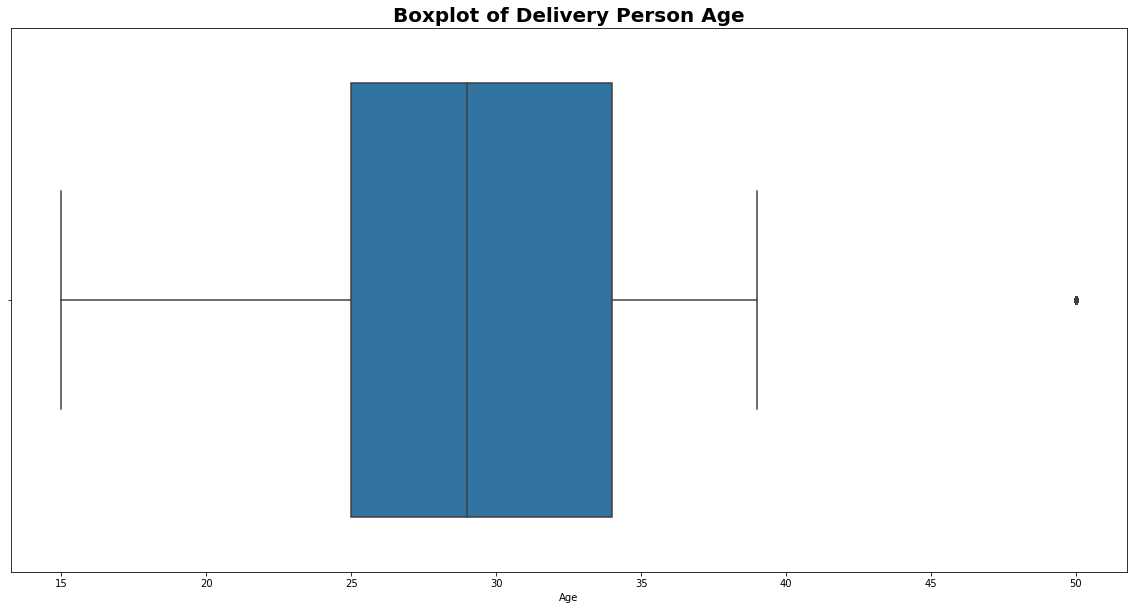

In [22]:
# Subset the "Delivery_person_Age" column
age_data = deliv_df["Delivery_person_Age"]

# Set the figure size
plt.figure(figsize=(20, 10))

# Create the boxplot
sns.boxplot(x=age_data)

# Customize the plot
plt.title("Boxplot of Delivery Person Age", fontsize=20, weight="bold")
plt.xlabel("Age")

# Display the plot
plt.show()


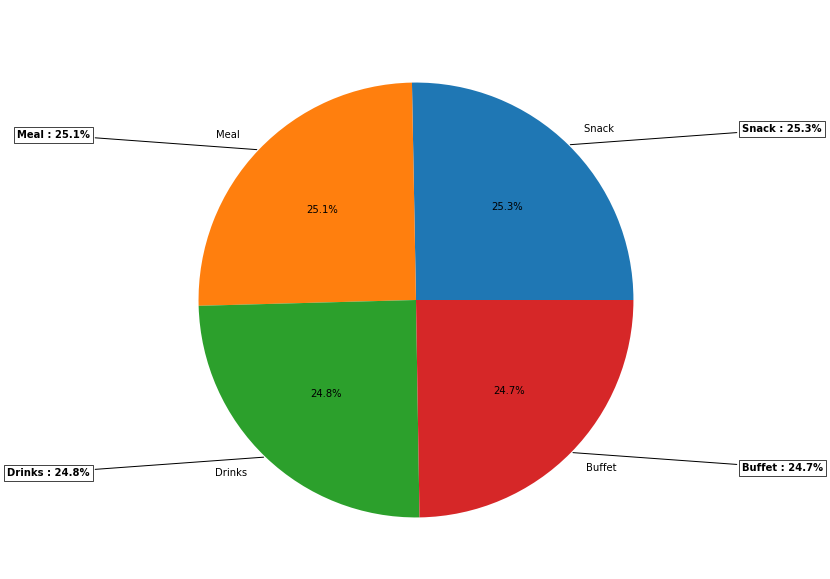

In [25]:
# Count the number of occurrences of each type of order
order_counts = deliv_df["Type_of_order"].value_counts()

# Set the figure size
plt.figure(figsize=(20, 10))

# Create the pie chart
pie = plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%')

# Add annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

previous_angle = 0
for i, count in enumerate(order_counts):
    percentage = count / order_counts.sum() * 100
    angle = previous_angle + (count / order_counts.sum() * 360)
    text_angle = previous_angle + ((angle - previous_angle) / 2)
    x = np.cos(np.deg2rad(text_angle))
    y = np.sin(np.deg2rad(text_angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={text_angle}"

    plt.annotate(f'{order_counts.index[i]}: {percentage:.1f}%',
                 xy=(x, y), xycoords='data',
                 xytext=(1.5 * np.sign(x), 1.1 * y), textcoords='data',
                 fontsize=10, fontweight='bold',
                 ha=horizontalalignment, va="center",
                 arrowprops=dict(arrowstyle="-"),
                 bbox=bbox_props)

    previous_angle = angle

# Set the title
plt.title("Distribution of Order Types", fontsize=20, fontweight='bold', color = 'white')

# Display the plot
plt.show()


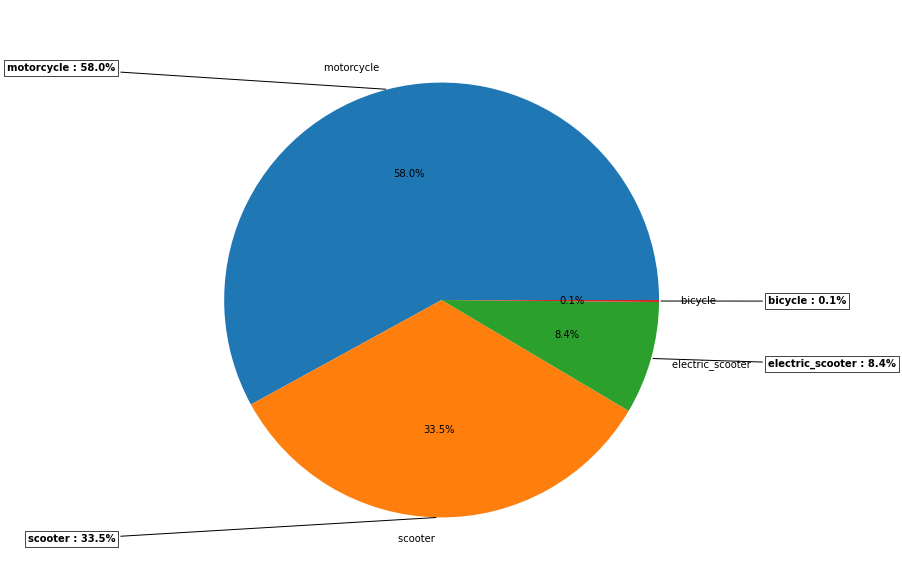

In [26]:
# Count the number of occurrences of each type of order
vehicle_counts = deliv_df["Type_of_vehicle"].value_counts()

# Set the figure size
plt.figure(figsize=(20, 10))

# Create the pie chart
pie = plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%')

# Add annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

previous_angle = 0
for i, count in enumerate(vehicle_counts):
    percentage = count / vehicle_counts.sum() * 100
    angle = previous_angle + (count / vehicle_counts.sum() * 360)
    text_angle = previous_angle + ((angle - previous_angle) / 2)
    x = np.cos(np.deg2rad(text_angle))
    y = np.sin(np.deg2rad(text_angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={text_angle}"

    plt.annotate(f'{vehicle_counts.index[i]}: {percentage:.1f}%',
                 xy=(x, y), xycoords='data',
                 xytext=(1.5 * np.sign(x), 1.1 * y), textcoords='data',
                 fontsize=10, fontweight='bold',
                 ha=horizontalalignment, va="center",
                 arrowprops=dict(arrowstyle="-"),
                 bbox=bbox_props)

    previous_angle = angle

# Set the title
plt.title("Distribution of Vehicle Types", fontsize=20, fontweight='bold', color = 'white')

# Display the plot
plt.show()


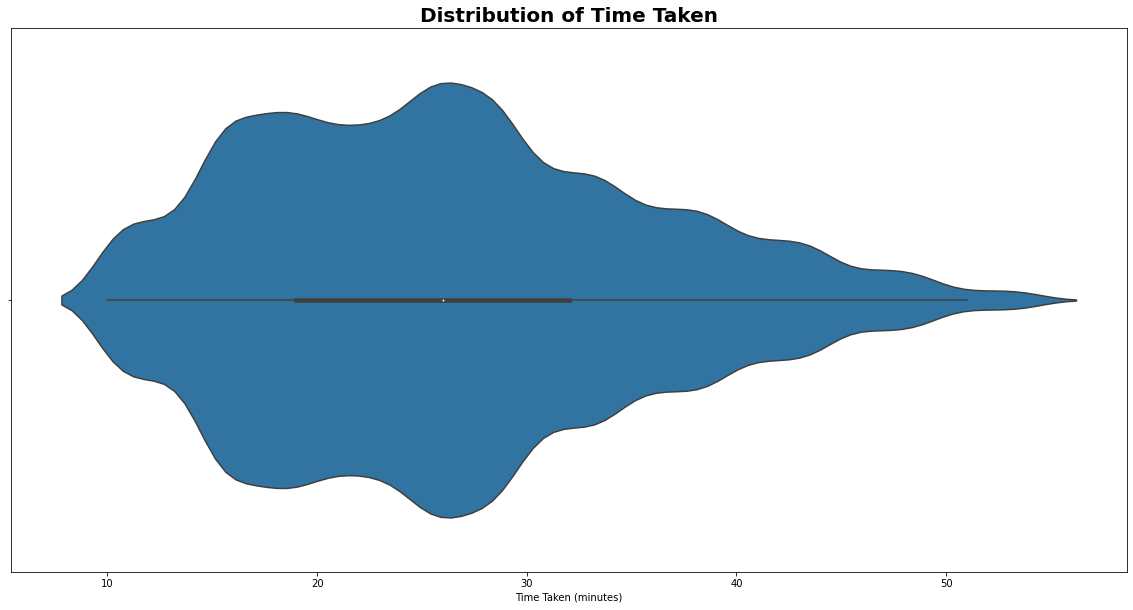

In [29]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create the violin plot
sns.violinplot(x=deliv_df["Time_taken(min)"])

# Set the x-axis label
plt.xlabel("Time Taken (minutes)")

# Set the title
plt.title("Distribution of Time Taken", fontsize=20, fontweight='bold', color = 'black')

# Display the plot
plt.show()


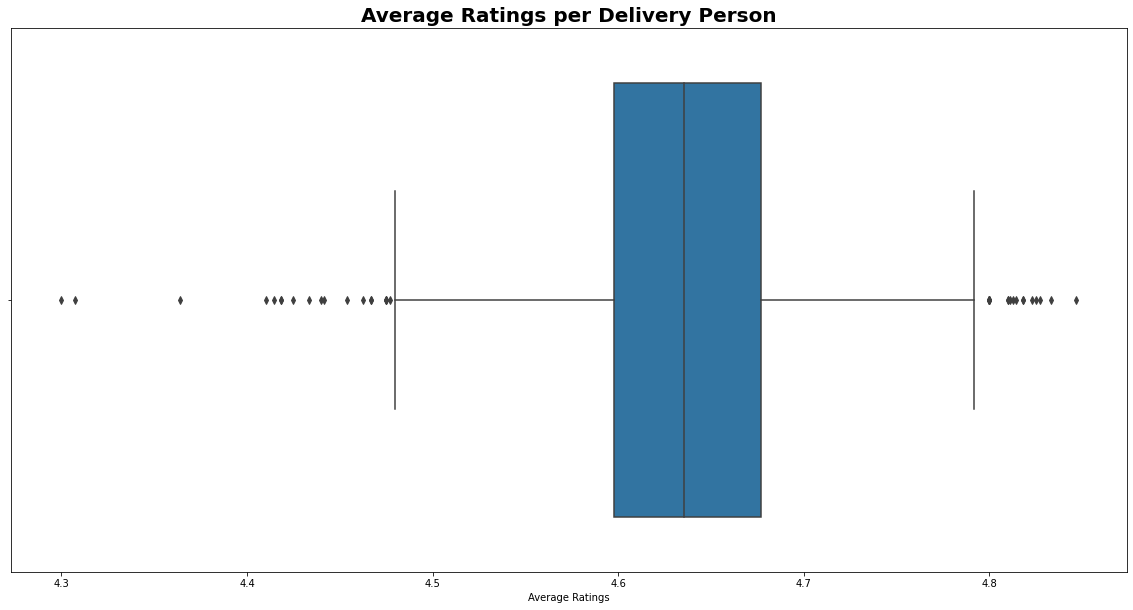

In [36]:
# Calculate average ratings per delivery person
avg_ratings = deliv_df.groupby("Delivery_person_ID")["Delivery_person_Ratings"].mean().reset_index()

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a boxplot of average ratings per delivery person
sns.boxplot(x=avg_ratings["Delivery_person_Ratings"])
plt.xlabel("Average Ratings")
plt.title("Average Ratings per Delivery Person", fontsize=20, fontweight='bold', color = 'black')

# Display the plot
plt.show()


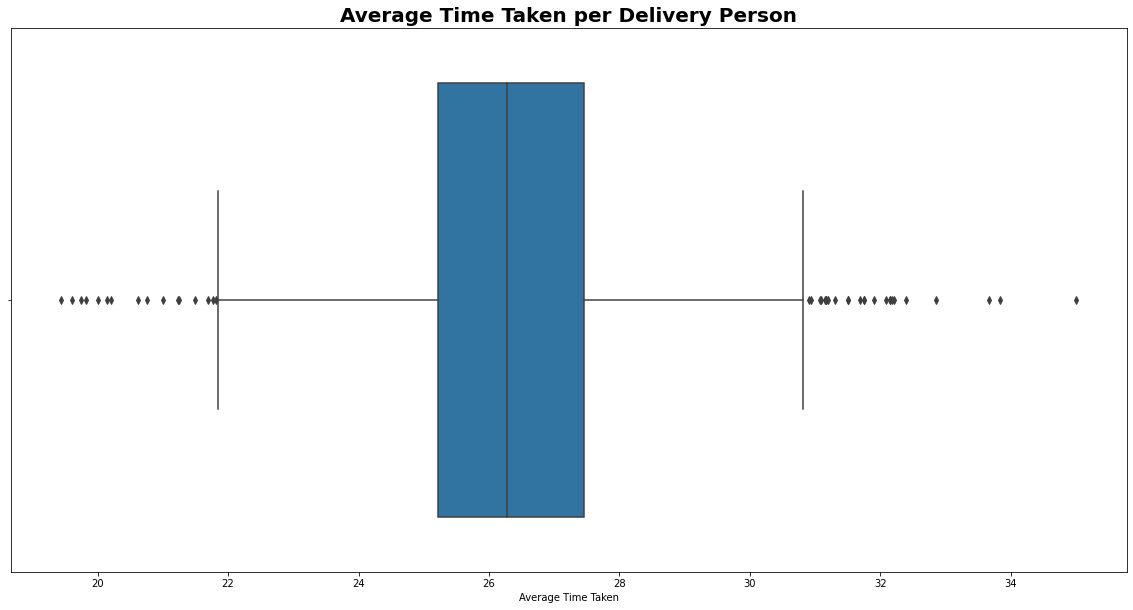

In [37]:
# Calculate average time taken per delivery person
avg_ratings = deliv_df.groupby("Delivery_person_ID")["Time_taken(min)"].mean().reset_index()

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a boxplot of average ratings per delivery person
sns.boxplot(x=avg_ratings["Time_taken(min)"])
plt.xlabel("Average Time Taken")
plt.title("Average Time Taken per Delivery Person", fontsize=20, fontweight='bold', color = 'black')

# Display the plot
plt.show()

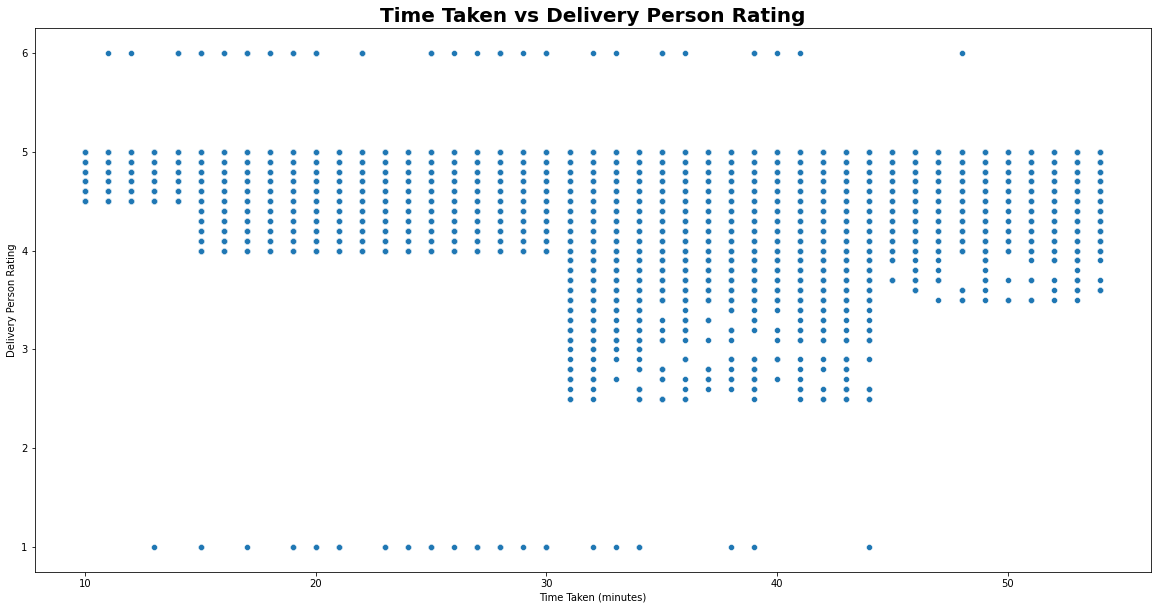

In [39]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create a scatter plot
sns.scatterplot(x="Time_taken(min)", y="Delivery_person_Ratings", data=deliv_df)

# Set the axis labels and title
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Delivery Person Rating")
plt.title("Time Taken vs Delivery Person Rating", fontsize=20, fontweight='bold', color = 'black')

# Display the plot
plt.show()


* Surprisingly, there doesn't seem to be any sisgnificant correlation between the Rating given and the delivery time.
    - We will look deeper into the factors influencing the rating later

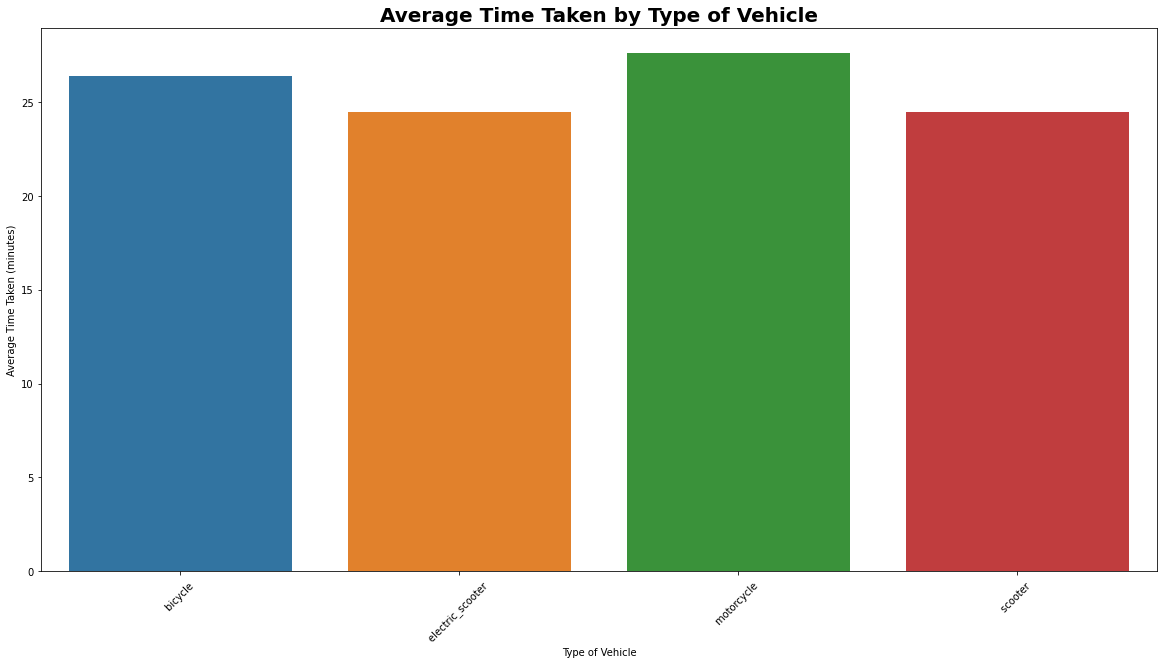

In [41]:
# Calculate the average time taken by each type of vehicle
avg_time_taken = deliv_df.groupby("Type_of_vehicle")["Time_taken(min)"].mean().reset_index()

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a bar plot
sns.barplot(x="Type_of_vehicle", y="Time_taken(min)", data=avg_time_taken)

# Set the axis labels and title
plt.xlabel("Type of Vehicle")
plt.ylabel("Average Time Taken (minutes)")
plt.title("Average Time Taken by Type of Vehicle", fontsize=20, fontweight='bold', color = 'black')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


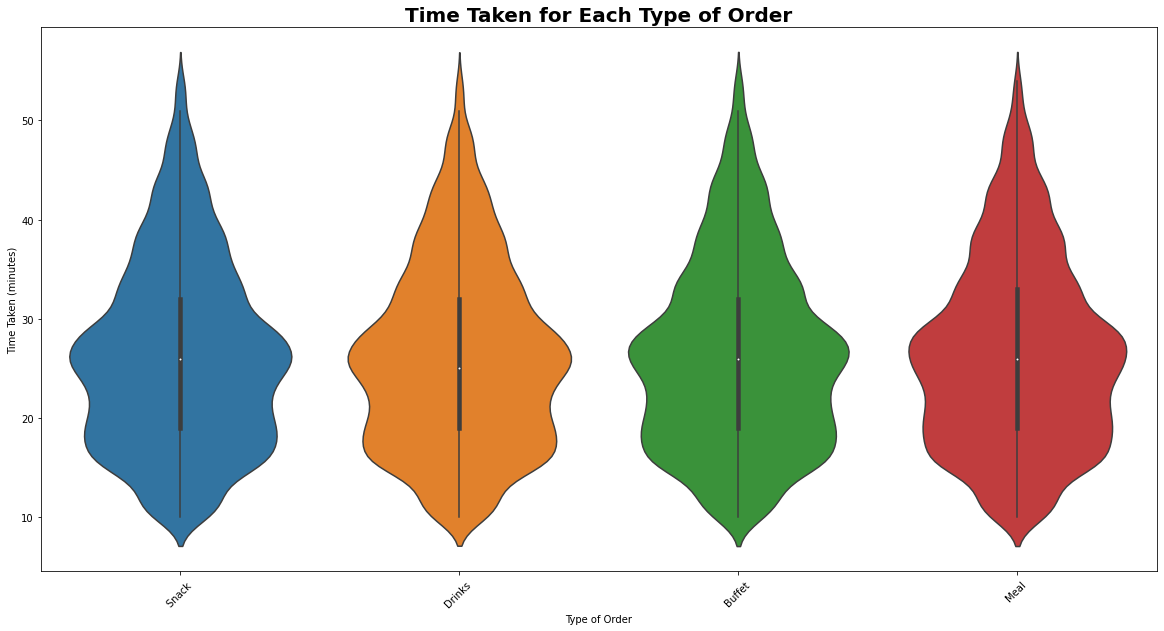

In [42]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create a violin plot
sns.violinplot(x="Type_of_order", y="Time_taken(min)", data=deliv_df)

# Set the axis labels and title
plt.xlabel("Type of Order")
plt.ylabel("Time Taken (minutes)")
plt.title("Time Taken for Each Type of Order", fontsize=20, fontweight='bold', color = 'black')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [43]:
# find the average time taken for each type of order
avg_time_taken = deliv_df.groupby("Type_of_order")["Time_taken(min)"].mean().reset_index()
print(avg_time_taken)

  Type_of_order  Time_taken(min)
0       Buffet         26.283511
1       Drinks         26.187953
2         Meal         26.419270
3        Snack         26.286309
